# CNN using Image Dataset for Multiclass Classification
Ashwin Gadge
<br>PRN 22070243020

In [38]:
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data paths
train_path = r"C:\Users\ashwin\Downloads\Brain_Tumor\Training"
test_path = r"C:\Users\ashwin\Downloads\Brain_Tumor\Testing"

In [22]:
#Data Generation -Train-Test
train_datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.3,
                                horizontal_flip=True,
                                zoom_range=0.3)

test_datagen=ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(
        train_path,
        target_size=(256,256),
        batch_size=32,
        class_mode="categorical",
        color_mode="grayscale")
test_generator=test_datagen.flow_from_directory(
        test_path,
        target_size=(256,256),
        batch_size=32,
        class_mode="categorical",
        color_mode="grayscale")


Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


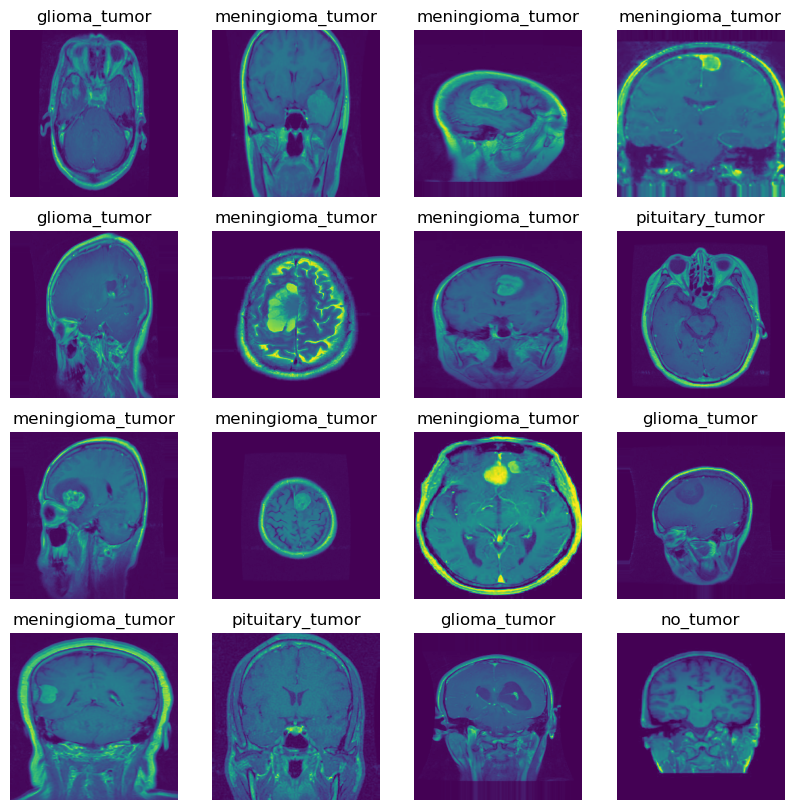

In [40]:
# Display some sample images
import numpy as np
class_names = list(train_generator.class_indices.keys())
sample_images, sample_labels = next(train_generator)

plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(sample_images[i])
    plt.title(class_names[np.argmax(sample_labels[i])])
    plt.axis('off')
plt.show()

In [24]:
from tensorflow.keras.models import Sequential # initialize neural network library
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Activation,Dropout,Flatten # build our layers library

In [41]:
# CNN MODEL
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(256,256,1)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.4))
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.4))
model.add(Dense(4))# output class sayısı kadar nöron
model.add(Activation("softmax"))


In [26]:
model.compile(loss="categorical_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

In [27]:
hist=model.fit(
            train_generator,
            steps_per_epoch=2581// 32,
            epochs=10,
            validation_data=test_generator,
            validation_steps=289// 32)

Epoch 1/10
80/80 [==============================] - 100s 1s/step - loss: 1.3171 - accuracy: 0.3765 - val_loss: 1.4000 - val_accuracy: 0.2535
Epoch 2/10
80/80 [==============================] - 101s 1s/step - loss: 1.1863 - accuracy: 0.4455 - val_loss: 1.3536 - val_accuracy: 0.3299
Epoch 3/10
80/80 [==============================] - 92s 1s/step - loss: 1.0419 - accuracy: 0.5353 - val_loss: 1.8677 - val_accuracy: 0.3542
Epoch 4/10
80/80 [==============================] - 102s 1s/step - loss: 0.9180 - accuracy: 0.6039 - val_loss: 2.2451 - val_accuracy: 0.3472
Epoch 5/10
80/80 [==============================] - 186s 2s/step - loss: 0.8519 - accuracy: 0.6289 - val_loss: 1.8857 - val_accuracy: 0.3611
Epoch 6/10
80/80 [==============================] - 139s 2s/step - loss: 0.8171 - accuracy: 0.6396 - val_loss: 2.5628 - val_accuracy: 0.4028
Epoch 7/10
80/80 [==============================] - 130s 2s/step - loss: 0.7661 - accuracy: 0.6714 - val_loss: 2.5640 - val_accuracy: 0.3681
Epoch 8/10
80/

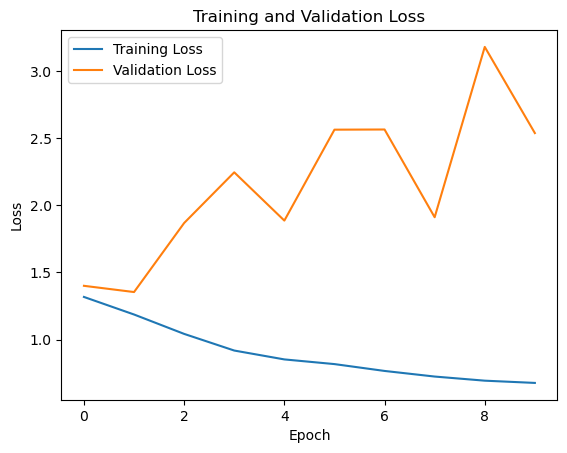

In [32]:
# Plot training history
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()

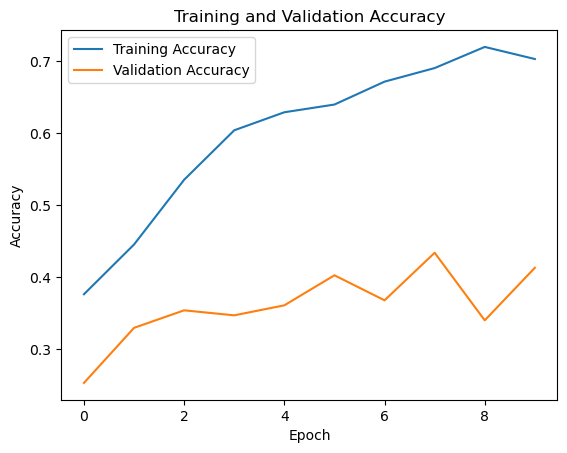

In [33]:
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.show()

In [35]:
# Evaluate on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc}")

13/13 [==============================] - 6s 407ms/step - loss: 2.5649 - accuracy: 0.4188
Test accuracy: 0.41878172755241394


In [37]:
model.save('CNN_Model') 


INFO:tensorflow:Assets written to: BT_CNN_Model\assets


INFO:tensorflow:Assets written to: BT_CNN_Model\assets
